# Performing a Regression Analysis 

## Table of Contents
* [01. Importing Libraries and Data](#01.-Importing-Libraries-and-Data)
* [02. Viewing Data and its Statistics](#02.-Viewing-Data-and-its-Statistics)
* [03. Prepping Data for Regression](#03.-Prepping-Data-for-Regression)
* [04. Regression Analysis for Test Set](#04.-Regression-Analysis-for-Test-Set)
* [05. Regression Analysis for Training Set](#05.-Regression-Analysis-for-Training-Set)

# 01. Importing Libraries and Data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Import data 
df_regress = pd.read_pickle(r'/Users/suzandiab/Documents/Cost of Living/02 Data/Prepared Data/df_map.pkl')

In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

# 02. Viewing Data and its Statistics

In [4]:
# Clean data 
df_regress.columns

Index(['case_id', 'state', 'metropolitan_area', 'county',
       'family_member_count', 'annual_housing_cost', 'annual_food_cost',
       'annual_transportation_cost', 'annual_healthcare_cost',
       'annual_other_necessities_cost', 'annual_childcare_cost',
       'annual_taxes', 'annual_total_cost', 'median_family_income',
       'parent_status', 'number_of_dependents', 'income_level'],
      dtype='object')

In [5]:
# Viewing df
df_regress.head()

,case_id,state,metropolitan_area,county,family_member_count,annual_housing_cost,annual_food_cost,annual_transportation_cost,annual_healthcare_cost,annual_other_necessities_cost,annual_childcare_cost,annual_taxes,annual_total_cost,median_family_income,parent_status,number_of_dependents,income_level
0,1,Alabama,True,Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.41406,single parent,0.0,Average Income
1,1,Alabama,True,Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.41406,single parent,1.0,Average Income
2,1,Alabama,True,Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.41406,single parent,2.0,Average Income
3,1,Alabama,True,Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.41406,single parent,3.0,Average Income
4,1,Alabama,True,Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.41406,single parent,4.0,Average Income


In [6]:
# Dimensions
df_regress.shape

(31016, 17)

In [8]:
# Check for missing values

df_regress.isnull().sum()

case_id                          0
state                            0
metropolitan_area                0
county                           0
family_member_count              0
annual_housing_cost              0
annual_food_cost                 0
annual_transportation_cost       0
annual_healthcare_cost           0
annual_other_necessities_cost    0
annual_childcare_cost            0
annual_taxes                     0
annual_total_cost                0
median_family_income             0
parent_status                    0
number_of_dependents             0
income_level                     0
dtype: int64

no missing values

In [9]:
# Checking for duplicates 
df_regress.duplicated().any()

False

no duplicates

/var/folders/4p/ym48tzyj1vv3lyzdlk4g93jh0000gn/T/ipykernel_31811/2980247976.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_regress['annual_housing_cost'], bins=25)
/Users/suzandiab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='annual_housing_cost', ylabel='Density'>

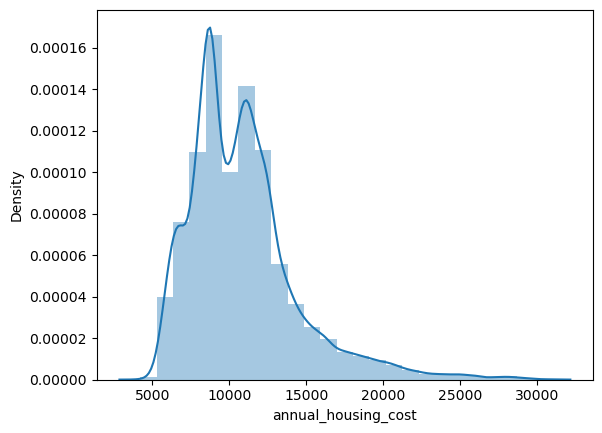

In [10]:
# Checking for extreme values 
sns.displot(df_regress['annual_housing_cost'], bins=25)

In [11]:
# Check mean
df_regress['annual_housing_cost'].mean()

10854.763500673202

In [12]:
# Check median
df_regress['annual_housing_cost'].median()

10356.0

In [13]:
# Check max
df_regress['annual_housing_cost'].max()

30792.0

# 03. Prepping Data for Regression

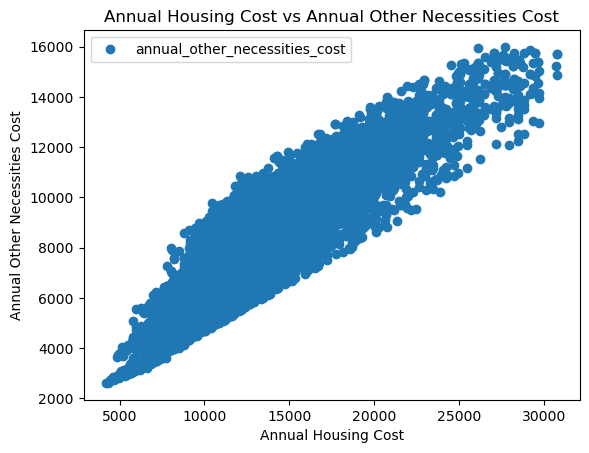

In [14]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_regress.plot(x = 'annual_housing_cost', y='annual_other_necessities_cost',style='o') 
plt.title('Annual Housing Cost vs Annual Other Necessities Cost')  
plt.xlabel('Annual Housing Cost')  
plt.ylabel('Annual Other Necessities Cost')  
plt.show()

If a household pays more for housing, then they will subsequently pay more for other necessities than a household who pays less for housing.

In [15]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_regress['annual_housing_cost'].values.reshape(-1,1)
y = df_regress['annual_other_necessities_cost'].values.reshape(-1,1)

In [16]:
X

array([[ 8505.72876],
       [12067.5024 ],
       [12067.5024 ],
       ...,
       [10956.     ],
       [13632.     ],
       [13632.     ]])

In [17]:
y

array([[ 4333.81344],
       [ 6217.45896],
       [ 7075.65816],
       ...,
       [ 7402.72416],
       [ 9130.76148],
       [10068.61968]])

In [18]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:
# Create a regression object.

regression = LinearRegression()  

In [20]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

# 04. Regression Analysis for Test Set

In [21]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

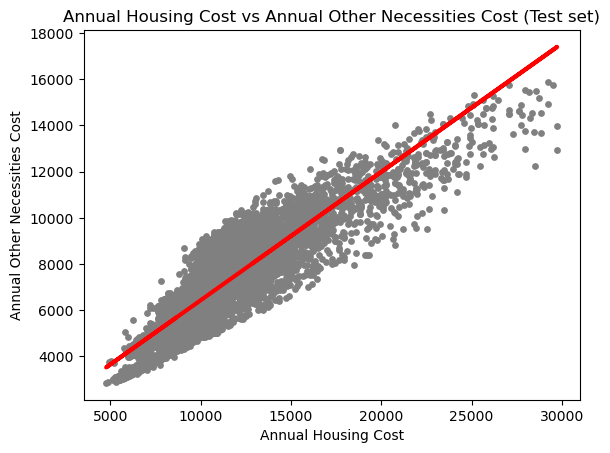

In [24]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
bar1 = plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Annual Housing Cost vs Annual Other Necessities Cost (Test set)')
plot_test.xlabel('Annual Housing Cost')
plot_test.ylabel('Annual Other Necessities Cost')
plot_test.show()

line seems to fit the data pretty well. most of the points are near the line. 

In [25]:
bar1.figure.savefig(r'/Users/suzandiab/Documents/Cost of Living/04 Analysis/Visualizations/regression.png', bbox_inches='tight')

In [26]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [27]:
# Print the model summary statistics. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.55556614]]
Mean squared error:  856775.0190967616
R2 score:  0.8171613128575606


81.7% out of 100% is a pretty good fit. 

In [28]:
y_predicted

array([[ 8062.9125875 ],
       [ 9533.33460113],
       [ 5019.44933852],
       ...,
       [ 5606.59312445],
       [12680.06121743],
       [ 5646.59388652]])

In [29]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,8052.64008,8062.912587
1,10708.08036,9533.334601
2,4643.41704,5019.449339
3,6720.19260,6219.938143
4,8589.14208,8253.310215
5,5738.76420,5733.262204
6,5824.89804,5773.262966
7,2853.66252,3526.066221
8,10570.24140,10985.824940
9,9758.83008,8500.961600


predicted values and actual y values are not far off from each other.

# 05. Regression Analysis for Training Set

In [30]:
# Predict.

y_predicted_train = regression.predict(X_train) 

In [31]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [32]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.55556614]]
Mean squared error:  869848.262974741
R2 score:  0.8204570045327912


model fits the training set only slightly better than the test set.
did not overfit model.

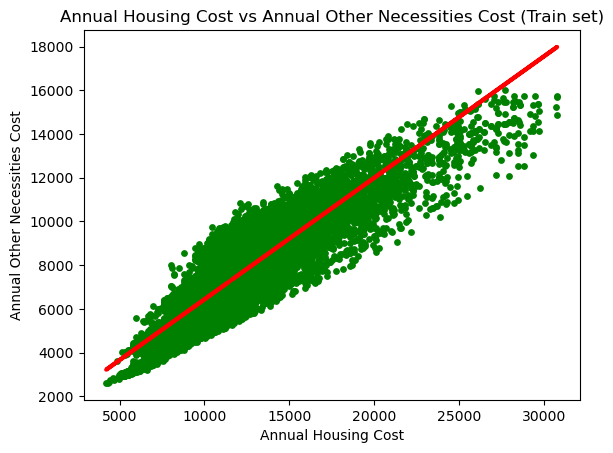

In [33]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Annual Housing Cost vs Annual Other Necessities Cost (Train set)')
plot_test.xlabel('Annual Housing Cost')
plot_test.ylabel('Annual Other Necessities Cost')
plot_test.show()

the model performed very well on the test set.
r squared value indicated it was a good fit.
so, we can look at annual housing cost as an indication for other necessities cost.

97 extreme values out of 31368 total values for annual housing cost were removed in previous data cleaning which only accounts for less than 1% so there should not be data bias.